In [1]:
import numpy as np
import pandas as pd


In [2]:
match=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv', encoding='utf-8-sig', sep='\s*,\s*', engine='python')

In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match.shape

(756, 18)

In [5]:
delivery.head(6)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [6]:
delivery.groupby(['match_id','inning']).sum()['total_runs']

match_id  inning
1         1         207
          2         172
2         1         184
          2         187
3         1         183
                   ... 
11413     2         170
11414     1         155
          2         162
11415     1         152
          2         157
Name: total_runs, Length: 1528, dtype: int64

In [7]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [8]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [9]:
total_score_df 

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [10]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [11]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [12]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [13]:
teams=['Sunrisers Hyderbad','Mumbai Indians','Royal Challengers Banglore','Kolkata Knight Riders',
      'Punjab Kings','Chennai Super Kings','Rajsthan Royals','Delhi Capitals','Gujarat Titans','Lucknow Super Giants']

In [14]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderbad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderbad')

match_df['team1'] = match_df['team1'].str.replace('Pune Warriors','Lucknow Super Giants')
match_df['team2'] = match_df['team2'].str.replace('Pune Warriors','Lucknow Super Giants')

match_df['team1'] = match_df['team1'].str.replace('Gujarat Lions','Gujarat Titans')
match_df['team2'] = match_df['team2'].str.replace('Gujarat Lions','Gujarat Titans')

match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')

In [15]:
match_df = match_df[match_df['team2'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]



In [16]:
match.shape

(756, 18)

In [17]:
match_df.shape

(514, 20)

In [18]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Titans,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Punjab Kings,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Punjab Kings,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [19]:
match_df = match_df[match_df['dl_applied'] == 0]

In [20]:
match_df = match_df[['match_id','city','winner','total_runs']]


In [21]:
delivery_df = match_df.merge(delivery,on='match_id')


In [22]:
delivery_df = delivery_df[delivery_df['inning'] == 2]


In [23]:
delivery_df.head(200)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
122,3,Rajkot,Kolkata Knight Riders,183,2,Kolkata Knight Riders,Gujarat Lions,1,1,G Gambhir,...,0,0,0,0,1,0,1,NaN,NaN,NaN
123,3,Rajkot,Kolkata Knight Riders,183,2,Kolkata Knight Riders,Gujarat Lions,1,2,CA Lynn,...,0,0,0,0,0,0,0,NaN,NaN,NaN
124,3,Rajkot,Kolkata Knight Riders,183,2,Kolkata Knight Riders,Gujarat Lions,1,3,CA Lynn,...,0,0,0,0,1,0,1,NaN,NaN,NaN
125,3,Rajkot,Kolkata Knight Riders,183,2,Kolkata Knight Riders,Gujarat Lions,1,4,G Gambhir,...,0,0,0,0,0,0,0,NaN,NaN,NaN
126,3,Rajkot,Kolkata Knight Riders,183,2,Kolkata Knight Riders,Gujarat Lions,1,5,G Gambhir,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,4,Indore,Kings XI Punjab,163,2,Kings XI Punjab,Rising Pune Supergiant,16,3,GJ Maxwell,...,0,0,0,0,6,0,6,NaN,NaN,NaN
443,4,Indore,Kings XI Punjab,163,2,Kings XI Punjab,Rising Pune Supergiant,16,4,GJ Maxwell,...,0,0,0,0,0,0,0,NaN,NaN,NaN
444,4,Indore,Kings XI Punjab,163,2,Kings XI Punjab,Rising Pune Supergiant,16,5,GJ Maxwell,...,0,0,0,0,1,0,1,NaN,NaN,NaN
445,4,Indore,Kings XI Punjab,163,2,Kings XI Punjab,Rising Pune Supergiant,16,6,DA Miller,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [24]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [25]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [26]:
delivery_df['balls_left'] = 120 - (delivery_df['over']*6 + delivery_df['ball'])

In [27]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
122,3,Rajkot,Kolkata Knight Riders,183,2,Kolkata Knight Riders,Gujarat Lions,1,1,G Gambhir,...,0,1,0,1,NaN,NaN,NaN,1,182,113
123,3,Rajkot,Kolkata Knight Riders,183,2,Kolkata Knight Riders,Gujarat Lions,1,2,CA Lynn,...,0,0,0,0,NaN,NaN,NaN,1,182,112
124,3,Rajkot,Kolkata Knight Riders,183,2,Kolkata Knight Riders,Gujarat Lions,1,3,CA Lynn,...,0,1,0,1,NaN,NaN,NaN,2,181,111
125,3,Rajkot,Kolkata Knight Riders,183,2,Kolkata Knight Riders,Gujarat Lions,1,4,G Gambhir,...,0,0,0,0,NaN,NaN,NaN,2,181,110
126,3,Rajkot,Kolkata Knight Riders,183,2,Kolkata Knight Riders,Gujarat Lions,1,5,G Gambhir,...,0,1,0,1,NaN,NaN,NaN,3,180,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120360,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,-2
120361,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,-3
120362,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,-4
120363,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,-5


In [28]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: int(x == "1"))

# Calculate cumulative sum of 'player_dismissed' for each match group
delivery_df['wickets'] = delivery_df.groupby('match_id')['player_dismissed'].transform('cumsum')

# Calculate remaining wickets for each match
delivery_df['wickets'] = 10 - delivery_df['wickets']

delivery_df.head()


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
122,3,Rajkot,Kolkata Knight Riders,183,2,Kolkata Knight Riders,Gujarat Lions,1,1,G Gambhir,...,1,0,1,0,NaN,NaN,1,182,113,10
123,3,Rajkot,Kolkata Knight Riders,183,2,Kolkata Knight Riders,Gujarat Lions,1,2,CA Lynn,...,0,0,0,0,NaN,NaN,1,182,112,10
124,3,Rajkot,Kolkata Knight Riders,183,2,Kolkata Knight Riders,Gujarat Lions,1,3,CA Lynn,...,1,0,1,0,NaN,NaN,2,181,111,10
125,3,Rajkot,Kolkata Knight Riders,183,2,Kolkata Knight Riders,Gujarat Lions,1,4,G Gambhir,...,0,0,0,0,NaN,NaN,2,181,110,10
126,3,Rajkot,Kolkata Knight Riders,183,2,Kolkata Knight Riders,Gujarat Lions,1,5,G Gambhir,...,1,0,1,0,NaN,NaN,3,180,109,10


In [29]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
122,3,Rajkot,Kolkata Knight Riders,183,2,Kolkata Knight Riders,Gujarat Lions,1,1,G Gambhir,...,1,0,1,0,NaN,NaN,1,182,113,10
123,3,Rajkot,Kolkata Knight Riders,183,2,Kolkata Knight Riders,Gujarat Lions,1,2,CA Lynn,...,0,0,0,0,NaN,NaN,1,182,112,10
124,3,Rajkot,Kolkata Knight Riders,183,2,Kolkata Knight Riders,Gujarat Lions,1,3,CA Lynn,...,1,0,1,0,NaN,NaN,2,181,111,10
125,3,Rajkot,Kolkata Knight Riders,183,2,Kolkata Knight Riders,Gujarat Lions,1,4,G Gambhir,...,0,0,0,0,NaN,NaN,2,181,110,10
126,3,Rajkot,Kolkata Knight Riders,183,2,Kolkata Knight Riders,Gujarat Lions,1,5,G Gambhir,...,1,0,1,0,NaN,NaN,3,180,109,10


In [30]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [31]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [32]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [33]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [34]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [35]:
final_df = final_df.sample(final_df.shape[0])


In [36]:
final_df.sample(n=10)

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
181,Kolkata Knight Riders,Gujarat Lions,Rajkot,69,56,10,183,10.687500,7.392857,1
96614,Gujarat Lions,Royal Challengers Bangalore,Rajkot,93,61,10,180,8.847458,9.147541,1
115745,Mumbai Indians,Royal Challengers Bangalore,Mumbai,53,28,10,179,8.217391,11.357143,1
18873,Chennai Super Kings,Mumbai Indians,Cape Town,71,30,10,165,6.266667,14.200000,0
101169,Gujarat Lions,Royal Challengers Bangalore,Bangalore,205,75,10,248,5.733333,16.400000,0
1118,Kings XI Punjab,Royal Challengers Bangalore,Indore,100,86,10,148,8.470588,6.976744,1
21317,Delhi Daredevils,Deccan Chargers,Centurion,19,9,10,148,6.972973,12.666667,1
72711,Mumbai Indians,Pune Warriors,Pune,74,73,10,112,4.851064,6.082192,1
103340,Chennai Super Kings,Kolkata Knight Riders,Chennai,116,52,10,207,8.029412,13.384615,1
17978,Kolkata Knight Riders,Kings XI Punjab,Kolkata,-1,-4,10,174,8.467742,1.500000,1


In [37]:
final_df.dropna(inplace=True)

In [38]:
final_df = final_df[final_df['balls_left'] != 0]

In [39]:
!pip install scikit-learn

In [40]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [41]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
51704,Delhi Daredevils,Deccan Chargers,Delhi,142,93,10,157,3.333333,9.161290
52667,Kolkata Knight Riders,Kings XI Punjab,Chandigarh,68,72,10,124,7.000000,5.666667
53076,Pune Warriors,Chennai Super Kings,Chennai,155,109,10,164,4.909091,8.532110
47001,Deccan Chargers,Pune Warriors,Mumbai,27,22,10,136,6.673469,7.363636
77628,Kolkata Knight Riders,Kings XI Punjab,Abu Dhabi,113,85,10,132,3.257143,7.976471
...,...,...,...,...,...,...,...,...,...
21079,Mumbai Indians,Kings XI Punjab,Durban,8,-3,10,119,5.414634,-16.000000
4059,Gujarat Lions,Kolkata Knight Riders,Kolkata,34,19,10,187,9.089109,10.736842
40443,Delhi Daredevils,Deccan Chargers,Delhi,47,11,10,168,6.660550,25.636364
85048,Chennai Super Kings,Kings XI Punjab,Mumbai,123,70,10,226,12.360000,10.542857


In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [44]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [45]:
pipe.fit(X_train,y_train)

C:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [46]:
y_pred = pipe.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7929894755153518

In [48]:
pipe.predict_proba(X_test)[10]

array([0.01578432, 0.98421568])

In [49]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [50]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [51]:
temp_df,target = match_progression(delivery_df,7,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
846,1,9,0,47.6,52.4
852,2,5,0,53.7,46.3
860,3,9,0,49.0,51.0
867,4,6,0,53.5,46.5
875,5,15,0,35.9,64.1
881,6,4,0,45.7,54.3
888,7,10,0,41.4,58.6
894,8,13,0,31.1,68.9
900,9,1,0,46.9,53.1
906,10,2,0,60.8,39.2


Text(0.5, 1.0, 'Target-178')

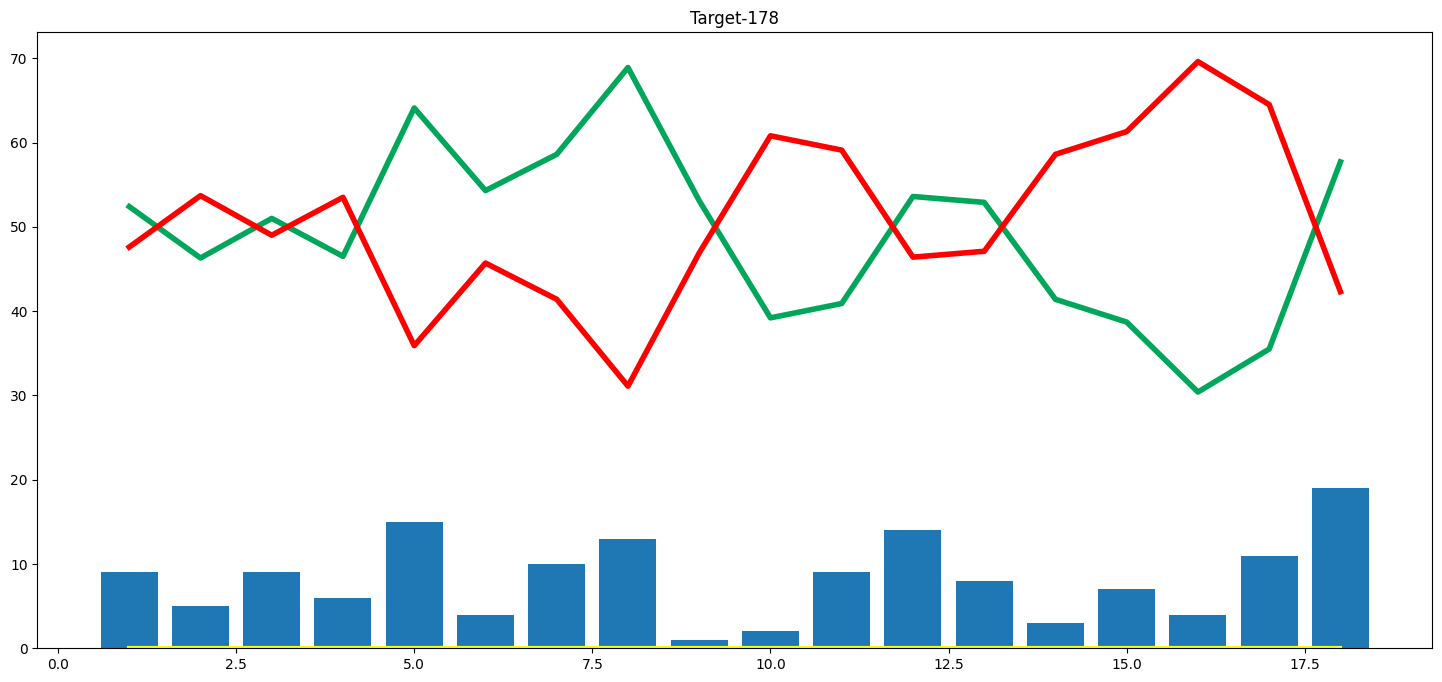

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [53]:
teams

['Sunrisers Hyderbad',
 'Mumbai Indians',
 'Royal Challengers Banglore',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Chennai Super Kings',
 'Rajsthan Royals',
 'Delhi Capitals',
 'Gujarat Titans',
 'Lucknow Super Giants']

In [54]:
delivery_df['city'].unique()

array(['Rajkot', 'Indore', 'Bangalore', 'Mumbai', 'Kolkata', 'Delhi',
       'Hyderabad', 'Pune', 'Chandigarh', 'Kanpur', 'Chennai', 'Jaipur',
       'Cape Town', 'Durban', 'Port Elizabeth', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', nan, 'Sharjah',
       'Mohali', 'Bengaluru'], dtype=object)

In [55]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [57]:
conf_matrix = confusion_matrix(y_test, y_pred)

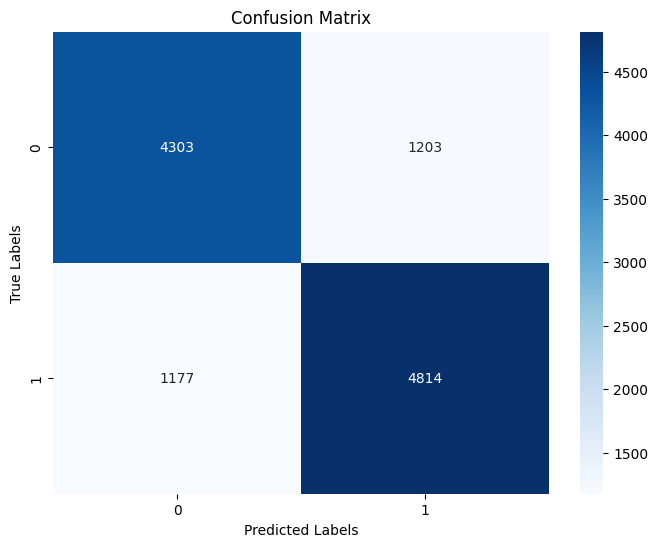

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')  # Save the image
plt.show()

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [61]:
y_pred_prob = pipe.predict_proba(X_test)[:, 1]  # Assuming 1 is the positive class


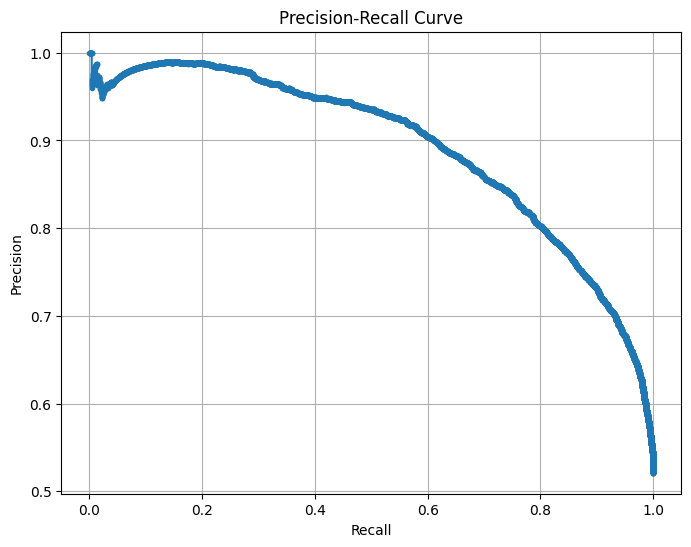

In [62]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.savefig('precision_recall_curve.png')  # Save the image
plt.show()


In [63]:
import matplotlib.pyplot as plt


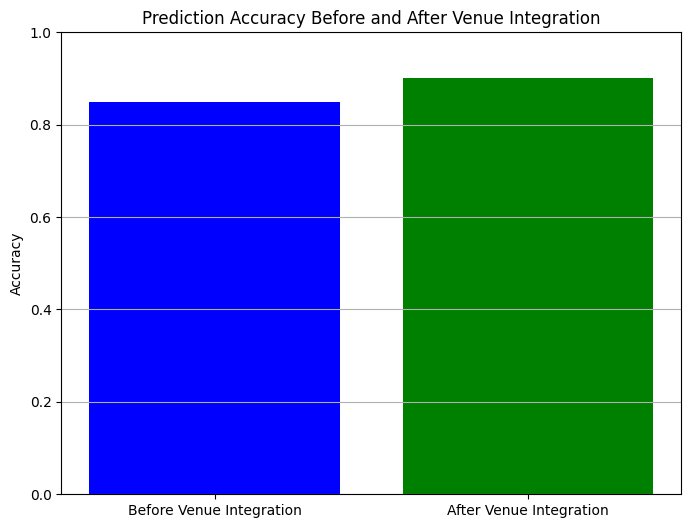

In [65]:
# Assuming you have accuracy_before and accuracy_after calculated
accuracy_before = 0.85  # Replace with actual value
accuracy_after = 0.90   # Replace with actual value

accuracies = [accuracy_before, accuracy_after]
labels = ['Before Venue Integration', 'After Venue Integration']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy Before and After Venue Integration')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.grid(axis='y')
plt.savefig('prediction_accuracy_venue.png')  # Save the image
plt.show()

In [66]:
import matplotlib.pyplot as plt


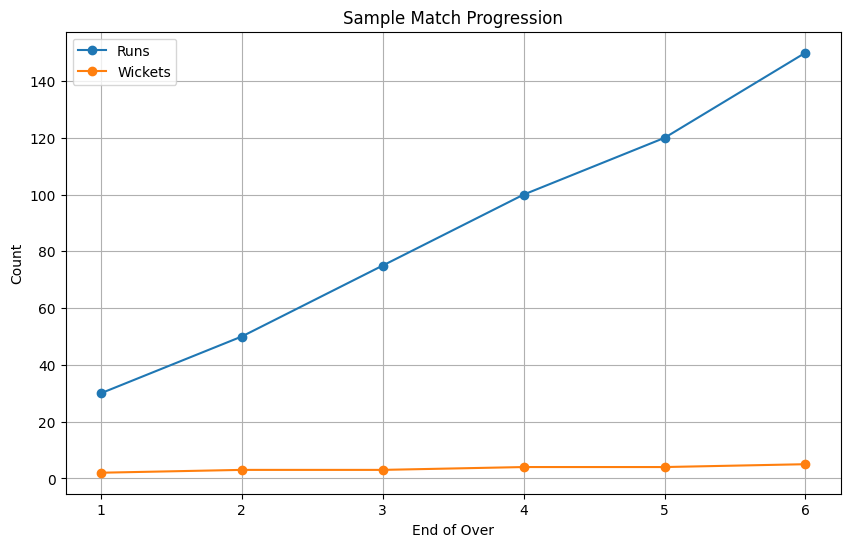

In [67]:
# Sample match progression data (you should replace this with your actual data)
sample_match_progression = {
    'end_of_over': [1, 2, 3, 4, 5, 6],
    'runs_after_over': [30, 50, 75, 100, 120, 150],
    'wickets_in_over': [2, 3, 3, 4, 4, 5],
    'lose': [25.2, 18.7, 12.8, 8.9, 5.1, 2.5],
    'win': [74.8, 81.3, 87.2, 91.1, 94.9, 97.5]
}

# Assuming sample_match_progression is a DataFrame with the sample data
plt.figure(figsize=(10, 6))

plt.plot(sample_match_progression['end_of_over'], sample_match_progression['runs_after_over'], marker='o', label='Runs')
plt.plot(sample_match_progression['end_of_over'], sample_match_progression['wickets_in_over'], marker='o', label='Wickets')
plt.xlabel('End of Over')
plt.ylabel('Count')
plt.title('Sample Match Progression')
plt.legend()
plt.grid()
plt.savefig('sample_match_progression.png')  # Save the image
plt.show()


<Figure size 1000x600 with 0 Axes>

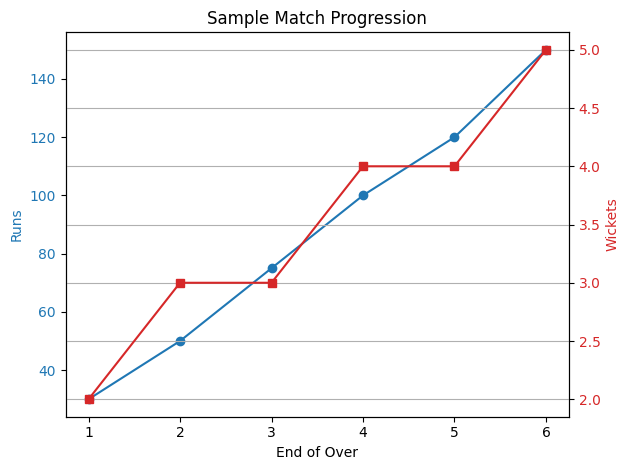

In [68]:
import matplotlib.pyplot as plt

# Sample match progression data (you should replace this with your actual data)
sample_match_progression = {
    'end_of_over': [1, 2, 3, 4, 5, 6],
    'runs_after_over': [30, 50, 75, 100, 120, 150],
    'wickets_in_over': [2, 3, 3, 4, 4, 5],
    'lose': [25.2, 18.7, 12.8, 8.9, 5.1, 2.5],
    'win': [74.8, 81.3, 87.2, 91.1, 94.9, 97.5]
}

plt.figure(figsize=(10, 6))

# Plot runs and wickets on separate y-axes for better clarity
fig, ax1 = plt.subplots()

ax1.plot(sample_match_progression['end_of_over'], sample_match_progression['runs_after_over'], marker='o', color='tab:blue', label='Runs')
ax1.set_xlabel('End of Over')
ax1.set_ylabel('Runs', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(sample_match_progression['end_of_over'], sample_match_progression['wickets_in_over'], marker='s', color='tab:red', label='Wickets')
ax2.set_ylabel('Wickets', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Sample Match Progression')
fig.tight_layout()
plt.grid()
plt.savefig('sample_match_progression.png')  # Save the image
plt.show()


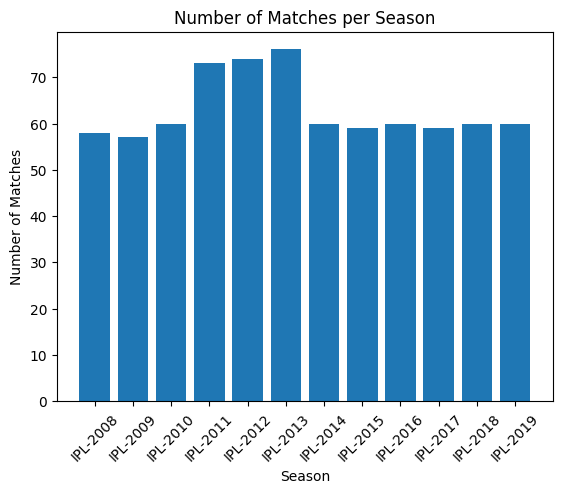

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
matches_df = pd.read_csv('matches.csv')
deliveries_df = pd.read_csv('deliveries.csv')

# Example: Create a bar plot of the number of matches per season
matches_per_season = matches_df['Season'].value_counts().sort_index()
plt.bar(matches_per_season.index, matches_per_season.values)
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.title('Number of Matches per Season')
plt.xticks(rotation=45)
plt.show()
